In [42]:
# problem 1


In [43]:
import numpy as np
import matplotlib.pyplot as plt

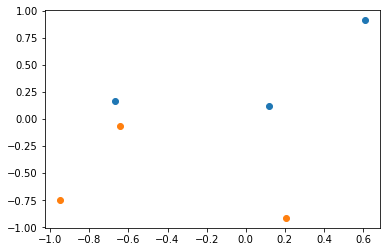

In [44]:
# part a 
def generateData(n=3):
    x1_upper = np.random.uniform(-1,1,n)
    x2_upper = np.random.uniform(0,1,n)
    x1_lower = np.random.uniform(-1,1,n)
    x2_lower = np.random.uniform(-1,0,n)
    return x1_upper, x2_upper, x1_lower, x2_lower

x1_upper, x2_upper, x1_lower, x2_lower = generateData()
plt.scatter(x1_upper, x2_upper)
plt.scatter(x1_lower, x2_lower)
plt.show()

a_svm = 0.029690186487694004
a_random = -0.34321582204112455


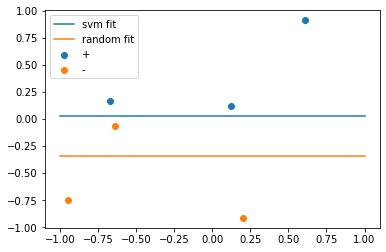

In [45]:
def compute_a_svm(x2_upper, x2_lower):
    return (np.min(x2_upper)+np.max(x2_lower))/2

a_svm = compute_a_svm(x2_upper, x2_lower)
a_random = np.random.uniform(-1, 1)
print("a_svm =", a_svm)
print("a_random =", a_random)

plt.scatter(x1_upper, x2_upper, label = "+")
plt.scatter(x1_lower, x2_lower, label = "-")
x = np.linspace(-1, 1)
plt.plot([-1, 1], [a_svm, a_svm], label = "svm fit")
plt.plot([-1, 1], [a_random, a_random], label = "random fit")
plt.legend()
plt.show()

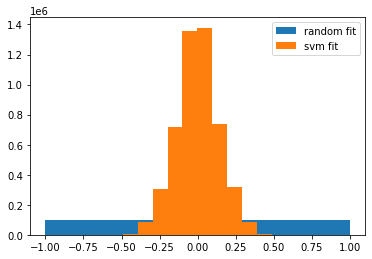

In [46]:
# part b
A2sv_svm = []
A2_random = []
for i in range(1000000):
    # repeat part a
    x1_upper2, x2_upper2, x1_lower2, x2_lower2 = generateData()
    a2_svm = compute_a_svm(x2_upper2, x2_lower2)
    a2_random = np.random.uniform(-1, 1)
    A2_svm.append(a2_svm)
    A2_random.append(a2_random)

plt.hist(A2_random, label = "random fit")    
plt.hist(A2_svm, label = "svm fit")
plt.legend()
plt.show()

Recall the definition of bias and variance:
$$ bias = E_x[bias(x_i)] = \frac{1}{N}\sum_{i=1}^{N}bias(x_i) = \frac{1}{N}\sum_{i=1}^{N}(\bar{g}(x_i) - f(x_i))^2$$

$$ var = E_x[var(x_i)] = \frac{1}{N}\sum_{i=1}^{N}var(x_i) = \frac{1}{N}\sum_{i=1}^{N}E_D[(g^{(D)}(x) - \bar{g}(x))^2] = \frac{1}{N}\frac{1}{K}\sum_{i=1}^{N}(g^{(D)}(x) - \bar{g}(x))^2$$

In [47]:
# part c

# compute bias
A_svm = np.array(A2_svm)
A_random = np.array(A2_random)
a_svm_mean = np.mean(A2_svm)
a_random_mean = np.mean(A2_random)

# the target function y = f(x1, x2) = sign(x2)
x2 = np.random.uniform(-1,1,1000000)
f = np.sign(x2)

g_bar_svm = np.sign(x2 - a_svm_mean)
g_bar_random = np.sign(x2 - a_random_mean)

bias_svm = np.mean((f-g_bar_svm)**2)
bias_random = np.mean((f-g_bar_random)**2)
print("bias_svm =", bias_svm)
print("bias_random =", bias_random)

bias_svm = 2e-05
bias_random = 0.00064


In [48]:
# compute variance
var_svm = []
var_random = []

# repeat the trial K=10000 times
for i in range(10000):
    x1_upper2, x2_upper2, x1_lower2, x2_lower2 = generateData()
    a_svm = compute_a_svm(x2_upper, x2_lower)
    a_random = np.random.uniform(-1, 1)
    # let N = 10000
    x2 = np.random.uniform(-1,1,10000)
    # compute g_bar
    g_bar_svm = np.sign(x2 - a_svm_mean)
    g_bar_random = np.sign(x2 - a_random_mean)
    # compute g_D
    g_svm = np.sign(x2 - a_svm)
    g_random = np.sign(x2- a_random)
    # compute 
    var_svm.append(np.mean((g_svm - g_bar_svm)**2))
    var_random.append(np.mean((g_random - g_bar_random)**2))
    
print("var_svm =", np.mean(var_svm))
print("var_random =", np.mean(var_random))

var_svm = 0.05943716
var_random = 1.00756708
